In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette='muted')

df = pd.read_csv("creditcard.csv")

# Add 'Hour' feature (if not already created)
if 'Hour' not in df.columns:
    df['Hour'] = (df['Time'] / 3600) % 24

# Split data into fraud and non-fraud subsets
fraud = df[df['Class'] == 1]
legit = df[df['Class'] == 0]

print(f"Legitimate Transactions: {len(legit)}")
print(f"Fraudulent Transactions: {len(fraud)}")


Legitimate Transactions: 284315
Fraudulent Transactions: 492


# Univariate Analysis

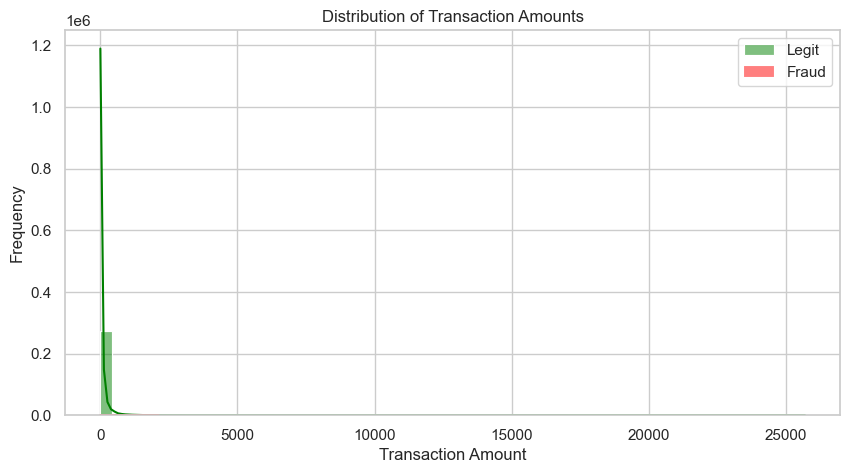

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(legit['Amount'], bins=60, color='green', label='Legit', kde=True)
sns.histplot(fraud['Amount'], bins=60, color='red', label='Fraud', kde=True)
plt.legend()
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()


In [15]:
df.groupby('Class')['Amount'].describe()


,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


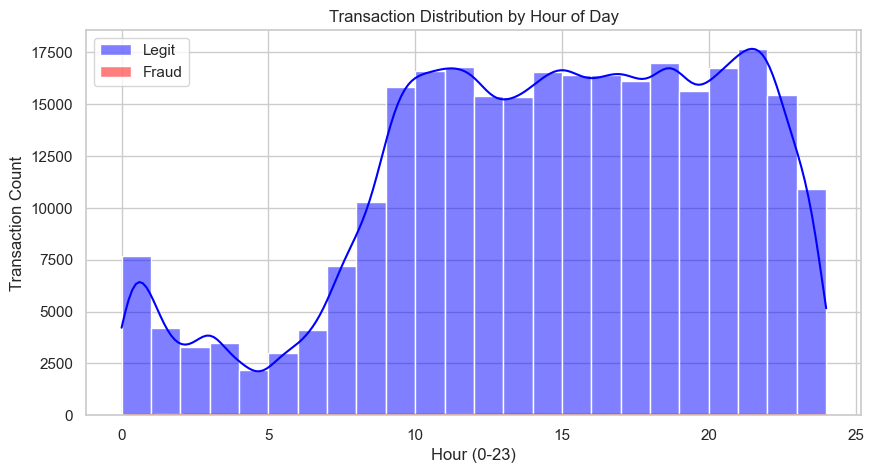

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(legit['Hour'], bins=24, color='blue', label='Legit', kde=True)
sns.histplot(fraud['Hour'], bins=24, color='red', label='Fraud', kde=True)
plt.legend()
plt.title("Transaction Distribution by Hour of Day")
plt.xlabel("Hour (0-23)")
plt.ylabel("Transaction Count")
plt.show()


C:\Users\AJAY JALAL\AppData\Local\Temp\ipykernel_19096\785122972.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette=['green', 'red'])


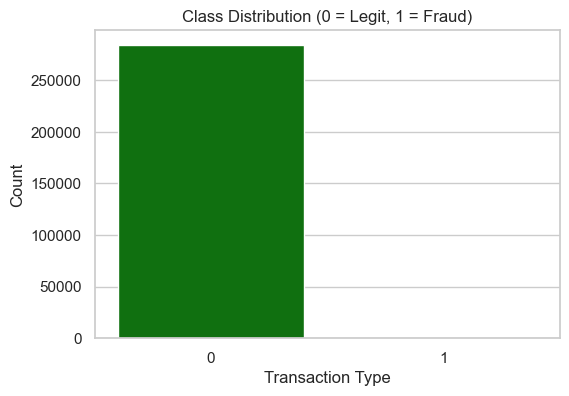

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df, palette=['green', 'red'])
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()


# Biavariate Analysis

C:\Users\AJAY JALAL\AppData\Local\Temp\ipykernel_19096\2651581863.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, palette=['green','red'])


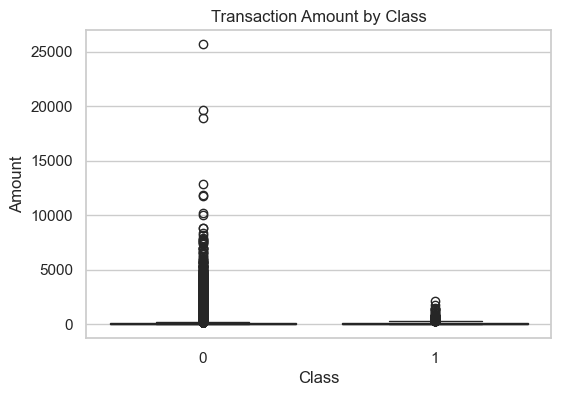

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Class', y='Amount', data=df, palette=['green','red'])
plt.title("Transaction Amount by Class")
plt.show()


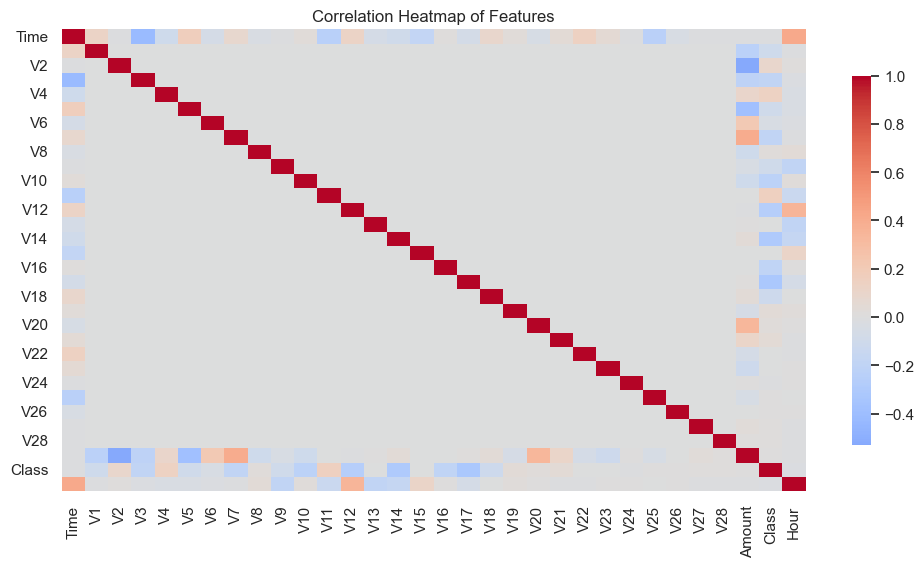

In [19]:
plt.figure(figsize=(12,6))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0, cbar_kws={'shrink': 0.8})
plt.title("Correlation Heatmap of Features")
plt.show()


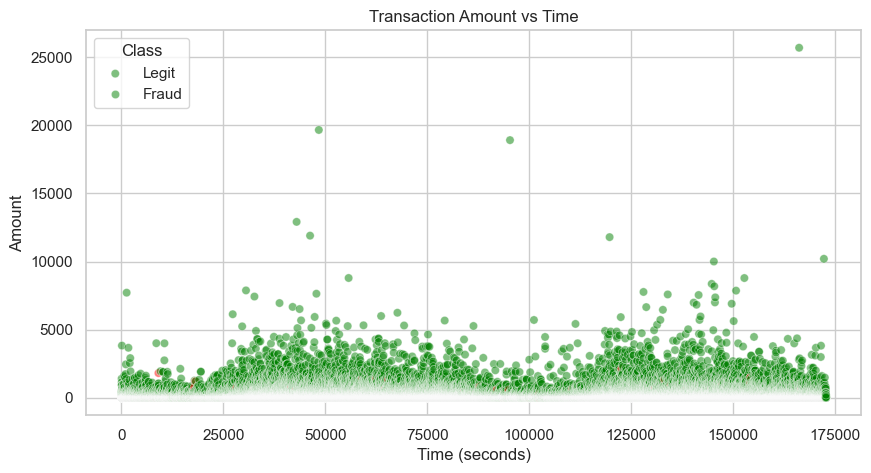

In [20]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df, alpha=0.5, palette=['green','red'])
plt.title("Transaction Amount vs Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Amount")
plt.legend(title="Class", labels=["Legit", "Fraud"])
plt.show()


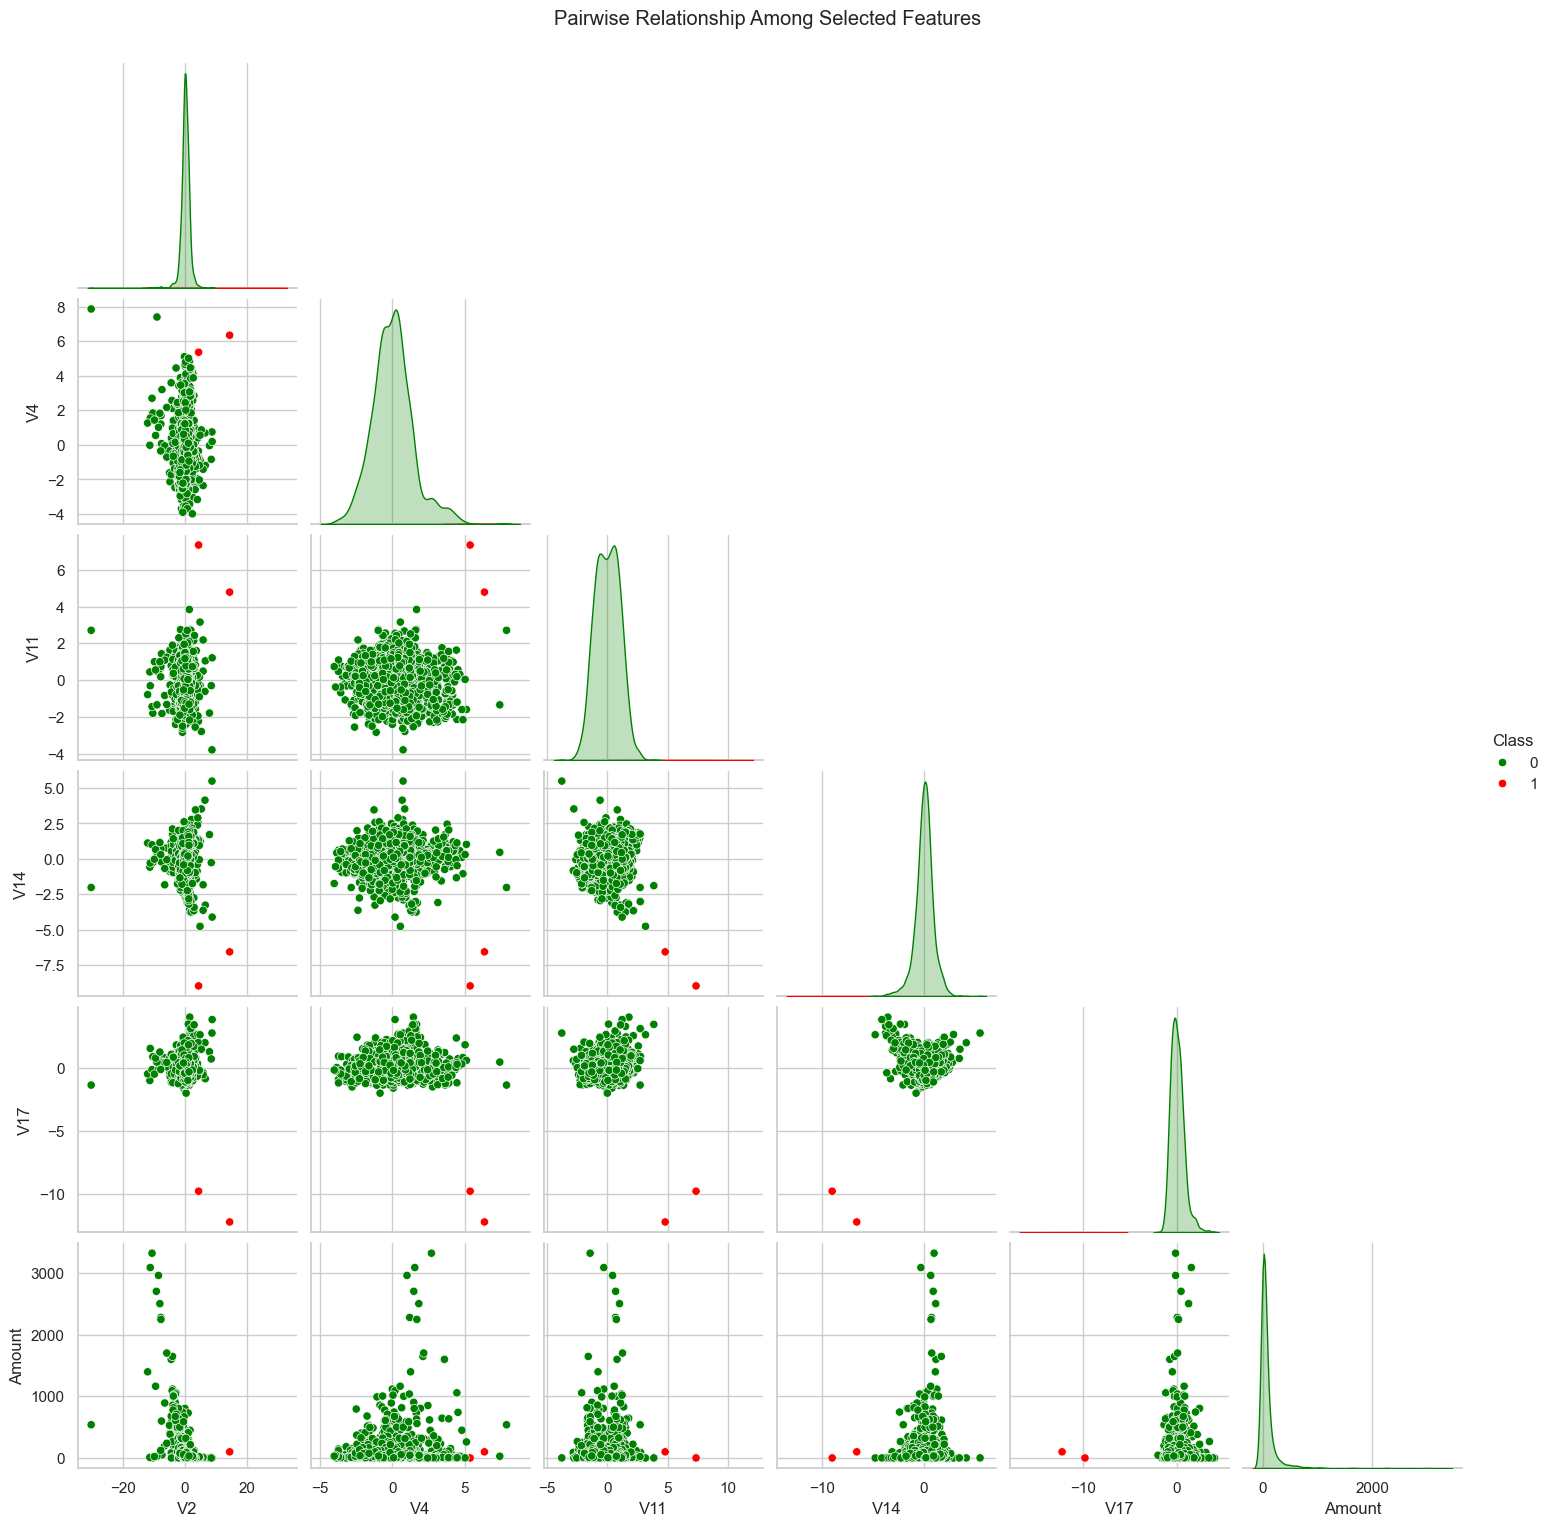

In [21]:
sample_features = ['V2', 'V4', 'V11', 'V14', 'V17', 'Amount', 'Class']
sns.pairplot(df[sample_features].sample(2000), hue='Class', palette=['green','red'], corner=True)
plt.suptitle("Pairwise Relationship Among Selected Features", y=1.02)
plt.show()


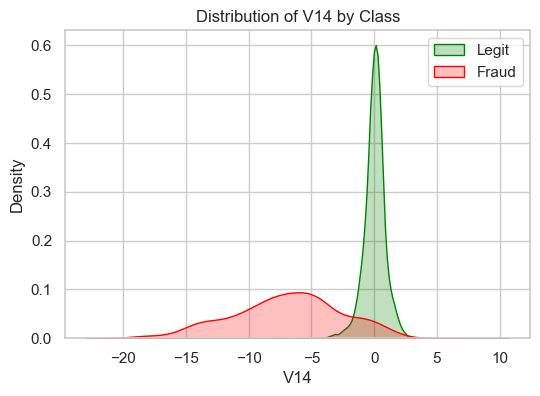

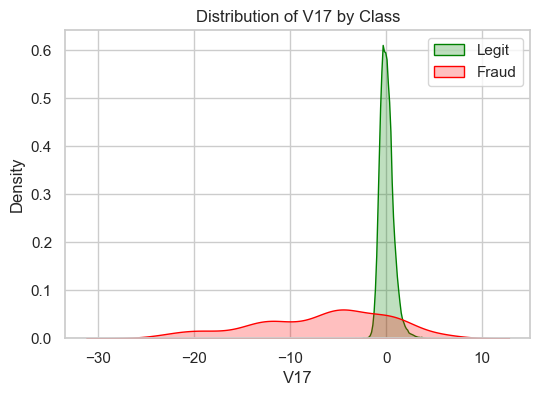

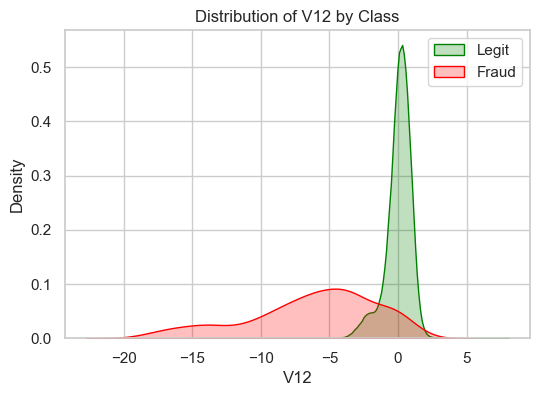

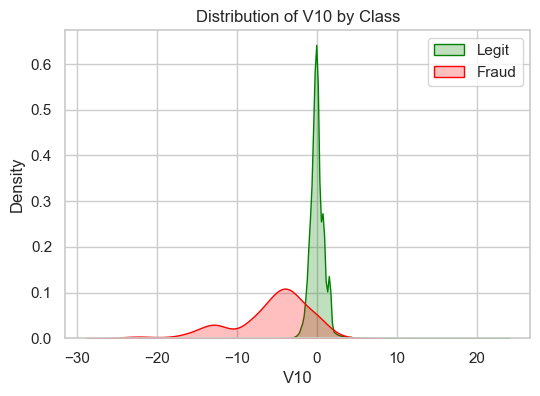

In [22]:
# Common strong predictor in this dataset are V14, V17, V12, V10
important_features = ['V14', 'V17', 'V12', 'V10']

for feature in important_features:
    plt.figure(figsize=(6,4))
    sns.kdeplot(legit[feature], label='Legit', fill=True, color='green')
    sns.kdeplot(fraud[feature], label='Fraud', fill=True, color='red')
    plt.title(f"Distribution of {feature} by Class")
    plt.legend()
    plt.show()


In [23]:
summary = pd.DataFrame({
    "Feature": important_features,
    "Legit_Mean": [legit[f].mean() for f in important_features],
    "Fraud_Mean": [fraud[f].mean() for f in important_features],
    "Legit_Std": [legit[f].std() for f in important_features],
    "Fraud_Std": [fraud[f].std() for f in important_features]
})

summary


,Feature,Legit_Mean,Fraud_Mean,Legit_Std,Fraud_Std
0,V14,0.012064,-6.971723,0.897007,4.278940
1,V17,0.011535,-6.665836,0.749457,6.970618
2,V12,0.010832,-6.259393,0.945939,4.654458
3,V10,0.009824,-5.676883,1.044204,4.897341
